# Time Series : Regression but depends on time

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('timeseries-data\DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Basic visualization

<Axes: >

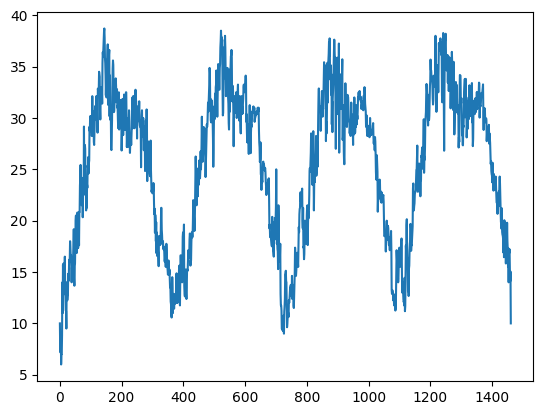

In [14]:
df.meantemp.plot()

## Better

In [15]:
figure = px.line(df, x='date', y='meantemp', title='Mean Temperature in Delhi')
figure.show()

In [16]:
figure = px.line(df, x='date', y='humidity', title='Mean Humidity in Delhi')
figure.show()

In [17]:
figure = px.line(df, x='date', y='wind_speed', title='Mean Windspeed in Delhi')
figure.show()


In [18]:
px.scatter(df, x='humidity', y='meantemp', size="meantemp",trendline="ols", title='Humidity vs Mean Temperature in Delhi')

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
# df['day'] = df['date'].dt.day
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


<Axes: xlabel='month', ylabel='meantemp'>

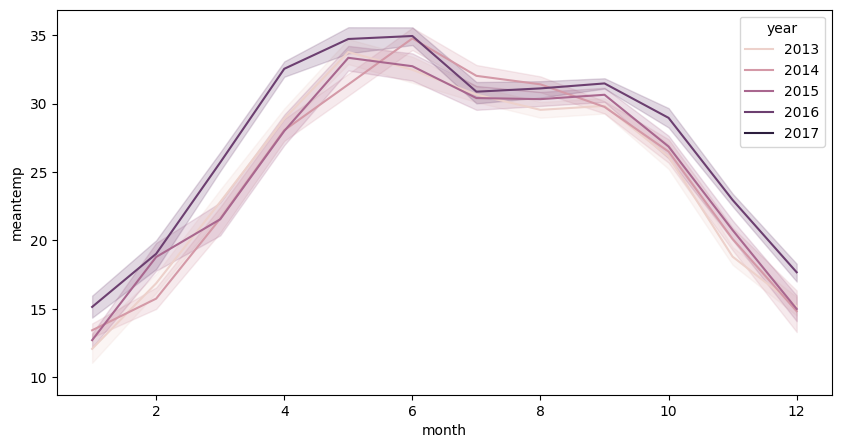

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='meantemp', data=df,hue='year')  

In [21]:
df.head() 

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


# Renaming the columns of the dataframe as Prophet needs the columns to be named as 'ds' and 'y'

In [22]:
fcast = df.rename(columns={'date':'ds', 'meantemp':'y'})

In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(fcast)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.head()

16:17:48 - cmdstanpy - INFO - Chain [1] start processing
16:17:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.168826,14.450325,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.257013,14.525801,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.395715,14.495467,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.360921,14.339398,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.050849,14.423011,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


In [24]:
plot_plotly(model, forecast)